In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=8434d52a0f1914104483054bef434e54352b5e08c7b7006e610f34498765fd1b
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


# Ex: WEIGHT

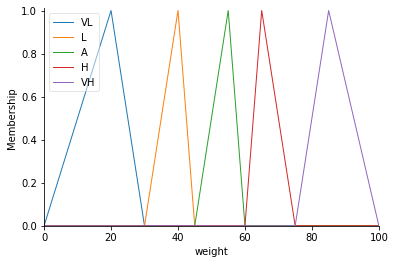

In [6]:
import numpy as np 
import skfuzzy as fuzz
from skfuzzy import control as ctrl
universe = np.linspace(0,100,101)
weight = ctrl.Antecedent(universe,'weight')
weight['VL']= fuzz.trimf(weight.universe,[0,20,30])
weight['L']= fuzz.trimf(weight.universe,[30,40,45])
weight['A']=fuzz.trimf(weight.universe,[45,55,60])
weight['H']=fuzz.trimf(weight.universe,[60,65,75])
weight['VH']=fuzz.trimf(weight.universe,[75,85,100])
weight.view()

# WLC


0.4999999999999999
0.7247241820418622


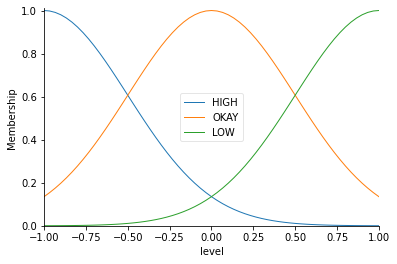

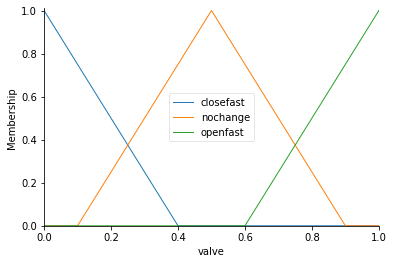

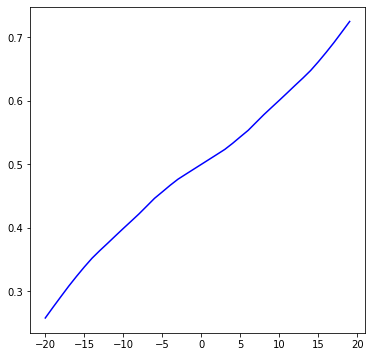

In [16]:
import numpy as np 
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
mang = []
mang1= []
universe = np.linspace(-1,1,61)
level = ctrl.Antecedent(universe,'level')
valve = ctrl.Consequent(np.arange(0,1.1,0.1),'valve')
level['HIGH']= fuzz.gaussmf(level.universe,-1,0.5)
level['OKAY']= fuzz.gaussmf(level.universe,0,0.5)
level['LOW']=  fuzz.gaussmf(level.universe,1,0.5)
level.view()

valve['closefast']= fuzz.trimf(valve.universe,[0,0,0.4])
valve['nochange']= fuzz.trimf(valve.universe,[0.1,0.5,0.9])
valve['openfast']=  fuzz.trimf(valve.universe,[0.6,1,1])
valve.view()

rule1 = ctrl.Rule(antecedent=(level['OKAY']),consequent=valve['nochange'],label= 'nochange')
rule2 = ctrl.Rule(antecedent=(level['LOW']),consequent=valve['openfast'],label= 'openfast')
rule3 = ctrl.Rule(antecedent=(level['HIGH']),consequent=valve['closefast'],label= 'closefast')
system = ctrl.ControlSystem(rules=[rule1, rule2,rule3])
systemsimu = ctrl.ControlSystemSimulation(system)
systemsimu.input['level'] = 0

systemsimu.compute()
print(systemsimu.output['valve'])

for i in range(-20,20,1):
  mang.append(i)
  systemsimu.input['level'] = i/20
  systemsimu.compute()
  mang1.append(systemsimu.output['valve'])
print(systemsimu.output['valve'])
plt.figure(figsize=(6,6))
plt.plot(mang,mang1,'b',linewidth = 1.5 , label = 'Full speed')